<a href="https://colab.research.google.com/github/mb1te/cm/blob/master/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ЛАБОРАТОРНАЯ РАБОТА 5. СРЕДНЕКВАДРАТИЧЕСКОЕ ПРИБЛИЖЕНИЕ ФУНКЦИЙ. МЕТОД НАИМЕНЬШИХ КВАДРАТОВ (МНК)**

**Задание. По любому произвольно задаваемому набору точек построить среднеквадратическое приближение методом наименьших квадратов для следующих функций:**

1. линейные функции $y=a_0+a_1 x$

2. квадратичные функции $y=a_0+a_1 x+a_2 x^2$ 

3. степенные функции $y=a x^b$

Очевидно, что график аппроксимирующей функции должен находиться внутри выпуклой оболочки, образованной точками.

Для каждого рассматриваемого набора точек, определять в каком случае приближение оптимально. Оптимальность характеризуется минимумом стандартного среднеквадратического отклонения.

Сгенерируем точки

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
n = 10
x = 100 * np.random.random(n)
y = 20 * np.random.random(n)
x, y

(array([90.40180546, 81.56100633, 38.78710289, 58.01807854, 24.19660868,
         5.92188524, 54.97537396, 71.6743603 , 93.12893381, 73.10509938]),
 array([ 2.42807308,  5.22852756,  4.61493084,  5.86484859, 18.28596899,
         6.71159255,  8.3935385 ,  4.82239316, 12.38267843,  6.2470588 ]))

1) Линейная аппроксимация

$
\cases {
  a_0 n + a_1 \sum\limits_{i = 1}^n x_i = \sum\limits_{i = 1}^n y_i\\
  a_0 \sum\limits_{i = 1}^n x_i + a_1 \sum\limits_{i = 1}^n x_i^2 = \sum\limits_{i = 1}^nx_i y_i
}
$

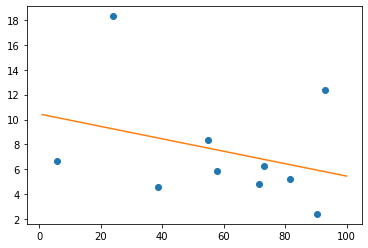

In [57]:
xi = sum(x)
yi = sum(y)
xy = sum(x*y)
x2 = sum(x*x)
left = np.array([[n, xi], [xi, x2]])
right = np.array([yi, xy])
solved = np.linalg.solve(left, right)
x_space = np.linspace(1, 100, 200)
y_space = [solved[0] + solved[1] * i for i in x_space]
plt.plot(x, y, "o")
plt.plot(x_space, y_space)
plt.show()

2) Квадратичная аппроксимация


$
\cases{
  a_0 + a_1 \sum\limits_{i = 1}^n x_i + a_2 \sum\limits_{i = 1}^n x_i^2 = \sum\limits_{i = 1}^n y_i\\
  a_0 \sum\limits_{i = 1}^n x_i + a_1 \sum\limits_{i = 1}^n x_i^2 + a_2 \sum\limits_{i = 1}^n x_i^3 = \sum\limits_{i = 1}^n y_i x_i\\
  a_0 \sum\limits_{i = 1}^n x_i^2 + a_1 \sum\limits_{i = 1}^n x_i^3 + a_2 \sum\limits_{i = 1}^n x_i^4 = \sum\limits_{i = 1}^n y_i x_i^2
}
$

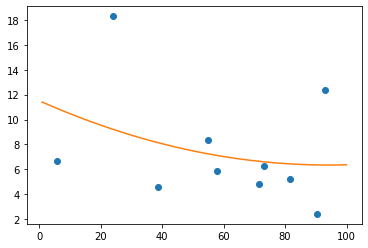

In [58]:
xi = sum(x)
yi = sum(y)
xy = sum(x*y)
x2 = sum(x*x)
x3 = sum(x*x*x)
x4 = sum(x*x*x*x)
yx2 = sum(y*x*x)

left = np.array([[n, xi, x2], [xi, x2, x3], [x2, x3, x4]])
right = np.array([yi, xy, yx2])
solved = np.linalg.solve(left, right)
x_space = np.linspace(1, 100, 200)
y_space = [solved[0] + solved[1] * i + solved[2] * i**2 for i in x_space]
plt.plot(x, y, "o")
plt.plot(x_space, y_space)
plt.show()

3) Степенная аппроксимация $y = a x^b$.

$
\cases {
  n\ln(a) + b \sum\limits_{i = 1}^n \ln(x_i) = \sum\limits_{i = 1}^n \ln(y_i)\\
  \ln(a) \sum\limits_{i = 1}^n \ln(x_i) + b \sum\limits_{i = 1}^n \left(\ln(x_i)\right)^2 = \sum\limits_{i = 1}^n \ln(y_i)\ln(x_i)
}
$

Решив систему аналитическим путем получаем следующие a и b: \\
$\displaystyle
\ln(a) = \frac{\sum \limits_{i = 1}^n \ln(y_i) \cdot \sum \limits_{i = 1}^n (\ln(x_i))^2 - \sum \limits_{i = 1}^n \ln(y_i)\ln(x_i) \cdot \sum \limits_{i = 1}^n \ln(x_i)}{n \sum \limits_{i = 1}^n (\ln(x_i))^2 - \left(\sum \limits_{i = 1}^n \ln(x_i)\right)^2} \\
\displaystyle
b = \frac{n \sum \limits_{i = 1}^n \ln(y_i)\ln(x_i) - \sum \limits_{i = 1}^n \ln(y_i) \cdot \sum \limits_{i = 1}^n ln(x_i)}{n \sum \limits_{i = 1}^n (\ln(x_i))^2 - \left(\sum \limits_{i = 1}^n \ln(x_i)\right)^2}
$

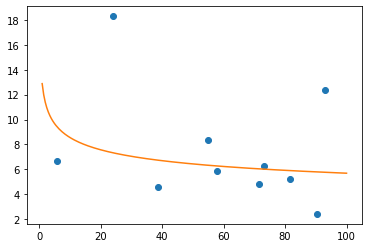

12.879213963533509 -0.17722368697412783


In [59]:
ln_x = np.log(x)
ln_y = np.log(y)
ln_y_ln_x = ln_x * ln_y
ln_x2 = np.log(x)**2

ln_a = (sum(ln_y) * sum(ln_x2) - sum(ln_y_ln_x) * sum(ln_x)) / (n * sum(ln_x2) - sum(ln_x)**2)
a = np.exp(ln_a)
b = (n * sum(ln_y_ln_x) - sum(ln_y) * sum(ln_x)) / (n * sum(ln_x2) - sum(ln_x)**2)

x_space = np.linspace(1, 100, 200)
y_space = [a * i**b for i in x_space]
plt.plot(x, y, "o")
plt.plot(x_space, y_space)
plt.show()
print(a, b)